In [1]:
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd 
import os

%matplotlib inline

In [13]:
data = open('180101t.txt', "r")
TEC = np.zeros(24*73*71).reshape(24,71,73)
TECU = []
# Анализ заголовка TEC - файла
currentLine = data.readline().rstrip('\n')
while(currentLine[60:].rstrip() != "END OF HEADER"):
    currentLine = data.readline().rstrip('\n')

#currentLine = data.readline().rstrip('\n')
#currentLine = data.readline().rstrip('\n')


itime = 0
ilat = 0
while currentLine.rstrip() != "":
    currentLine = data.readline().rstrip('\n')
    if(currentLine[60:].rstrip() != "START OF TEC MAP"):
        for row in range(5):
            currentLine = data.readline()
            TECU.extend(currentLine.split())
       
        
        #print(TECU, len(TECU))
        k=0
        for i in TECU:
            TEC[itime, ilat, k] = float(i)
            k = k+1
            
        TECU.clear()
        ilat = ilat+1
        if ilat >= 71:
            print(itime)
            ilat = 0
            itime = itime+1
            
    else:
        currentLine = data.readline().rstrip('\n')
   
            
    if itime>23:
        break
    #global TEC_day_map

    TEC_day_map = np.zeros(73*71).reshape(71,73)
    for lat in range(71):
        for long in range(73):
            TEC_day_map[lat, long] = np.mean(TEC[:, lat, long])/10
#print(TEC[:,0,0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
[47. 41. 41. 41. 39. 37. 36. 35. 36. 35. 31. 28. 25. 26. 28. 25. 21. 21.
 21. 22. 30. 35. 35. 35.]


In [16]:
print(np.mean(TEC[:,0,1]))

31.916666666666668


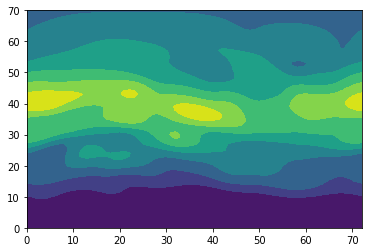

In [15]:
plt.contourf(TEC_day_map)